In [ ]:
# Математические функции
import math
import numpy as np
# Графики
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 7)



# Центральная предельная теорема

Даже если исходная выборка не является нормально распределенной, если мы смоделируем несколько таких случайных выборок и возьмем средние, эти средние величины будут представлять собой **нормальное распределение**.
$$ \sqrt{n} \frac{\bar{X_n} - \mu}{\sigma} -> N(0,1)$$

Среднее значение из выборочных средних = 0.33462445229083776
Стандартное отклонение полученных средних = 0.0026322607499039644


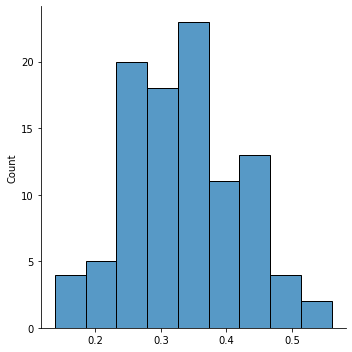

In [9]:
# Будем генерировать 1000 бета распределений и посмотрим на распределение средних
mean_list, n = [], 1000
for _ in range(n):
    beta = np.random.beta(a=10, b=20, size=100)
    mean_list.append(beta.mean())
sns.displot(beta);
print(f"Математическое ожидание бета-распределения: a / (a + b) = 0.33")
print(f"Среднее значение из выборочных средних = {np.mean(beta)}")
print(f"Стандартное отклонение полученных средних = {np.std(beta) / np.sqrt(n)}")


# Закон Больших Чисел
При достаточно большом количестве испытаний среднее значение случайной величины будет все ближе к своему теоретическому значению.
$$ P(|\bar{X_n} - \mu_n| <= \epsilon) -> 1 $$ $$n -> \infty$$

Пример: будем подбрасывать кубик и смотреть на среднее значение для разного количества испытаний.

In [ ]:
# Пять подбрасываний
print(np.mean([np.random.randint(1,7) for _ in range(5)]))
# 50 Подбрасываний
print(np.mean([np.random.randint(1,7) for _ in range(50)]))
# 500 Подбрасываний
print(np.mean([np.random.randint(1,7) for _ in range(500)]))
# 5000 Подбрасываний
print(np.mean([np.random.randint(1,7) for _ in range(5000)]))
# 50000 Подбрасываний
print(np.mean([np.random.randint(1,7) for _ in range(50000)]))

## PANDAS


Проверка гипотез используется в статистике для опровержения или
неопровержения некоторых предположений,
выдвигаемых исследователями. Поскольку на практике мы всегда имеем дело
с выборкой, а не с самой генеральной совокупностью данных,
полученные результаты на основании той или иной выборки могут быть неточны и не всегда воспроизводимы на других выборках.

Пример - социальные или медицинские исследования, которые при повторных испытания могут давать различные результаты. 

https://en.wikipedia.org/wiki/Replication_crisis

https://www.nature.com/news/1-500-scientists-lift-the-lid-on-reproducibility-1.19970

https://statisticsbyjim.com/hypothesis-testing/reproducibility-p-values/

John P. A. Ioannidis - "Why Most Published Research Findings Are False", 2005

# Общая схема проверки гипотез на примере классического АБ-тестирования

Допустим, что мы хотим изменить дизайн сайта / приложения и посмотреть
экономический эффект от данных изменений. В простом эксперименте мы
пускаем юзеров по двум вариантам дизайна (первый - контрольный - вариант
без изменений; второй - тестовый - вариант с измененным дизайном).
В этой лекции мы не будем подробно останавливаться на том, как
правильно конструировать дизайн эксперимента, а разберем лишь теоретические
и практические моменты непосредственно тестирования. Про АБ-тесты подробно
можно почитать в презентации.

###  Общая схема проверки гипотез при АБ тестировании
1. Выдвигается нулевая гипотеза **$H_0$** (*эффекта от изменений нет* - разница
между средней конверсией/доходом статистически отлична от нуля)
и альтернативная гипотеза **$H_1$** (*эффект от изменения есть* -
есть существенная разница между средней конверсией / доходом)
2. Выбирается **уровень значимости** - вероятность ошибочно обнаружить
статистически значимый эффект, когда его на самом деле нет (как правило,
это 5% или 0.05 - в 5 случаях из 100 мы совершим эту ошибку)
3. На основании собранных данных вычисляем **статистику теста**, которая
при определенных предпосылках имеет некоторое **известное распределение**.
Для разных метрик мы используем разные статистики
4. Вычисляем **p-value** этой статистики (вероятность находиться в
центре распределения статистики теста). Если **p-value** превышает уровень значимости,
то у нас недостаточно оснований отклонить нулевую гипотезу (эффекта нет).
Следовательно, в этом случае новый вариант дизайна не приводит
к существенным экономическим изменениям

#### Ошибки первого и второго рода
Если уровень значимости - это ошибка первого рода (***вероятность найти
эффект, когда его на самом деле нет***), то ошибка второго рода -
это ***вероятность не найти эффект, когда он на самом деле есть).
Мощность теста определяется как 1 - ошибка второго рода.
Как правило, на тест фиксируют уровень значимости в 5% и мощность в 80%.

## Тесты проверки распределений на нормальность
    
Обширный список критериев согласия для проверки на нормальность представлен тут:
https://docviewer.yandex.ru/view/0/?page=16&*=ChdkZogunLp6fYDwqDsdvXyyJEV7InVybCI6InlhLWRpc2stcHVibGljOi8vNHJ3clVnVmRPYnNDaDNBYlFhSEZWNGFyVW9SeHpMS3pxSHlzemhNUnlOcz0iLCJ0aXRsZSI6ItC60YDQuNGC0LXRgNC40Lgg0L3QvtGA0LzQsNC70YzQvdC%2B0YHRgtC4INCy0YHQtS5wZGYiLCJub2lmcmFtZSI6ZmFsc2UsInVpZCI6IjAiLCJ0cyI6MTYwMjU3ODExMzMyOSwieXUiOiI1MjQ5ODg3NDYxNjAyNTAxNDY1In0%3D

    

Мы, в свою очередь, рассмотрим основные тесты на нормальность, использующиеся в повседневной статистике. 

### Тест Харке-Бера и Шапиро-Уилка
Эти тесты проверяют, является ли распределение случайной величины нормальным или нет.

Предположения: наблюдения в  выборке независимы и одинаково распределены (iid).

$H_0$: распределение нормальное

$H_a$: распределение не нормальное 

In [ ]:
# Тест Шапиро-Уилка
from scipy.stats import shapiro
# Уровень значимости - 5%
alpha = 0.05
data = norm.rvs(loc = 1, scale = 1, size = 10)

stat_shapiro, p_shapiro = shapiro(data)
print('stat_shapiro=%.3f, p_shapiro=%.3f' % (stat_shapiro, p_shapiro))
if p_shapiro > alpha:
    print('Согласно тесту Шапиро-Уилка на 5% уровне значимости делаем вывод \
в пользу не отвержения нулевой гипотезы - распределение нормальное')
else:
    print('Согласно тесту Шапиро-Уилка на 5% уровне значимости делаем вывод \
в пользу отвержения нулевой гипотезы \ - распределение НЕ нормальное')
print("\n")

# Тест Харке-Бера
from scipy.stats import jarque_bera
# Уровень значимости - 5%
alpha = 0.05
data = norm.rvs(loc = 1, scale = 1, size = 10)

stat_jb, p_jb = jarque_bera(data)
print('stat_jb=%.3f, p_jb=%.3f' % (stat_jb, p_jb))
if p_jb > alpha:
    print('Согласно тесту Харке-Бера на 5% уровне значимости делаем вывод \
в пользу не отвержения нулевой гипотезы - распределение нормальное')
else:
    print('Согласно тесту Харке-Бера на 5% уровне значимости делаем вывод \
в пользу отвержения нулевой гипотезы \ - распределение НЕ нормальное')
print("\n")


## 2. Параметрические тесты
#### <center>Параметрические тесты используются в ситуации, когда распределение одной или нескольких случайных величин известно. Как правило, в данных тестах требуется выполнение условия нормальности. Бывают как для одной, так и для нескольких переменных.
    

### Тест Стьюдента о равенстве среднего значения определенному значению из генеральной совокупности

$H_0$: $\bar{x} = \mu$

$H_1$: $\bar{x} \neq \mu$

$$t_{stat} = \frac{\bar{x} - \mu} {\sigma / \sqrt{n}}$$

### Тест Стьюдента о равенстве средних двух независимых выборок


Проверяет, существенно ли различаются средние значения для двух независимых выборок.

Предпосылки:

- Наблюдения в каждой выборке независимы и идентично распределены (iid).
- Наблюдения в каждой выборке нормально распределены.

H0: средние равны

H1: средние не равны

$$ t = \frac{\bar{x_1} - \bar{x_2}} {\sqrt{s^2_p * (1/n_1 + 1/n_2)}} $$ 
$$ s^2_p = \frac{(n_1 - 1)s^2_1 + (n_2 - 1)s^2_2} {n_1 + n_2 - 2}  $$

In [ ]:
from scipy.stats import ttest_ind
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Средние равны')
else:
    print('Средние не равны')

In [ ]:
import numpy as np
m1, m2 = np.mean(data1), np.mean(data2)
s1, s2 = np.var(data1, ddof = 1), np.var(data2, ddof = 1)
n1, n2 = len(data1), len(data2)
s2p = ((n1 - 1)*s1 + (n2 - 1)*s2)/(n1 + n2 - 2)
t_stat = (m1 - m2) / (np.sqrt(s2p * (1/n1 + 1/n2)))
t_stat

### Тест на равенство дисперсий двух независимых выборок

Проверяет, существенно ли различаются дисперсии значения для двух независимых выборок.

Предпосылки:

- Наблюдения в каждой выборке независимы и идентично распределены (iid).
- Наблюдения в каждой выборке нормально распределены.

H0: дисперсии равны

H1: дисперсии не равны

$$ F_{stat} = \frac{s_1}{s_2} $$ 
<center>  vs <center>
$$ F_{crit}(\alpha, n_1-1, n_2-1) $$

In [ ]:
F_stat = s1 / s2 
from scipy.stats import f as f_
F_crit = f_.pdf(0.975, len(data1)-1, len(data2)-1)
F_stat > F_crit

### Тест Стьюдента равенства средних из двух парных выборок

Пример: берем студентов (например, вас) и смотрим как вы сдаете разные экзамены на сессии.

Проверяет, существенно ли различаются средние в двух парных выборках.

Предпосылки:

- Наблюдения в каждой выборке независимы и идентично распределены (iid).
- Наблюдения в каждой выборке нормально распределены.
- Наблюдения в каждой выборке являются парными.

H0: средние значения равны.

H1: средние значения не равны.

In [ ]:
from scipy.stats import ttest_rel
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
# Проверка равенства дисперсий

print(np.var(data1) - np.var(data2))

stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Средние равны')
else:
    print('Средние не равны')

### Тест на значимость коэффициента корреляции Пирсона

Проверяет, значима ли корреляция Пирсона.

Предпосылки:

- Наблюдения в каждой выборке независимы и одинаково распределены (iid).
- Наблюдения в каждой выборке нормально распределены.

H0: коэффициент корреляции Пирсона не значимо отличен от нуля

H1: коэффициент корреляции Пирсона значимо отличен от нуля

In [ ]:
from scipy.stats import pearsonr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p,  = pearsonr(data1, data2)
corr = np.corrcoef([data1, data2])[0,1]
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Корреляция не значима отлична от нуля на 5% уровне')
else:
    print(f'Корреляция значима на 5% уровне значимости и равна {corr}')

### Применение Хи-квадрат теста для анализа таблиц сопряженности

Таблица сопряжённости (таблица контингентности, факторная таблица) в статистике — средство представления совместного распределения двух переменных, предназначенное для исследования связи между ними. Таблица сопряжённости является наиболее универсальным средством изучения статистических связей, так как в ней могут быть представлены переменные с любым уровнем измерения. Таблицы сопряжённости часто используются для проверки гипотезы о наличии связи между двумя признаками с использованием точного теста Фишера или критерия согласия Пирсона. Часто применяют в медицине для тестирования работы препаратов.



Предпосылки:
- Наблюдения, использованные при расчете таблицы сопряженности, являются независимыми.
- В каждой ячейке таблицы содержится 25 и более наблюдений.

$H_0$: прививка не влияет на заболеваемость

$H_1$: прививка влияет на заболеваемость

#### Пример Хи-квадрат теста для таблиц сопряженности

Допустим, мы хотим узнать, помогает ли людям прививка от холеры. По столбцам таблицы обозначен факт болезни, по строкам - факт прививки.

| Прививался или нет \  Болел - Не болел| Не болел | Болел | Всего |
| --- | --- | --- | --- |
| Не прививался | 1022 | 11 | 1033|
| Прививался| 1625 | 5 | 1630 |
| Всего| 2647 | 16 | 2663 |


In [ ]:
from scipy.stats import chi2_contingency

table = [[1022, 11],[1625,  5]]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Не значимо отлична от нуля на 5% уровне')
else:
    print('Значимо отлична от нуля на 5% уровне')

### Тест на значимость коэффициента регрессии (один коэффициент)
Предпосылки:
- Выполнены условия Гаусса-Маркова
- Ошибки регрессии распределены по нормальному закону

$H_0: \theta=0$

$H_1: \theta \neq 0$

Статистика теста:

$ t_{stat} = \frac{\hat{\theta} - \theta_{H_0}}{s.e.(\theta)} $, $ t \in  t_{n-p} $

$s.e.(\theta) = \sqrt{\frac{RSS}{(n-p)}} * (X^TX)^{-1}$, $RSS = \sum_i(y_i - \hat{y})^2$

Если $|t_{stat}| > t_{crit}(\alpha)$ ->  нулевая гипотеза отвергается в пользу альтернативной 

In [ ]:
from sklearn.datasets import load_boston 
y, X = load_boston()['target'], load_boston()['data']
# Добавим вектор единиц (модели с константой)
X = np.hstack([np.ones([X.shape[0], 1]), X])
y_name = 'price'
X_names = list(load_boston()['feature_names'])
X_names.insert(0,"const")

# Парная регрессия с первой переменной
X_reg = X[:, :2]
# Оценки коэффициентов
coefs_1 = np.linalg.inv(X_reg.T @ X_reg) @ X_reg.T @ y 
print(f"Коэффициенты регрессии равны {coefs_1}")
# Значения, лежащие на подобранной прямой 
y_fitted = X_reg @ coefs_1
RSS = np.sum((y - y_fitted)**2)
# Стандартные ошибки
print(f"Стандартные ошибки равны {np.sqrt(RSS / (X_reg.shape[0] - X_reg.shape[1]) * np.linalg.inv(X_reg.T @ X_reg))}")

In [ ]:
import statsmodels.api as sm
model = sm.OLS(endog = y, exog = X[:, :10])
results_simple = model.fit()
results_simple.summary(xname = X_names[:10])

### Тест на совместную значимость коэффициентов регрессии (больше одного коэффициента)

Предпосылки:
- Выполнены условия Гаусса-Маркова
- Ошибки регрессии распределены по нормальному закону

$H_0: \theta_1=\theta_2=\theta_3=...=\theta_p=0$

$H_1$ :хотя бы один коэффициент не равен нулю

Статистика теста:

$ F_{stat} = \frac{(RSS_{H_0} - RSS) / (p-1)} {RSS / (n-p)} $

Если $|F_{stat}| > F_{crit}(\alpha)$ со степенями свободы p-1 и n-p ->  нулевая гипотеза отвергается в пользу альтернативной 

In [ ]:
# Множественная регрессия с тремя переменными
X_reg = X[:, :4]
# Оценки коэффициентов
coefs_2 = np.linalg.inv(X_reg.T @ X_reg) @ X_reg.T @ y 
print(f"Коэффициенты регрессии равны {coefs_2}")

In [ ]:
# Проверим на совместную значимость две последние переменные 

# 3. Непараметрические тесты
#### <center>Параметрические тесты, как правило, являются более мощными и могут проверить более широкий спектр альтернативных гипотез. Непараметрические тесты, в свою очередь, используются в ситуации, когда распределение одной или нескольких случайных величин не удовлетворяет необходимым предпосылкам. В таком случае применение параметрических тестов будет неверно методологически, что может привести к нашей известной проблеме "невоспроизводимости результатов" в будущем. 

### Тест Манна-Уитни о равенстве распределений двух независимых выборок

In [ ]:
from scipy.stats import mannwhitneyu
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat_mu, p_mu = mannwhitneyu(data1, data2)
sns.distplot(data1)
sns.distplot(data2)
print('stat=%.3f, p=%.3f' % (stat_mu, p_mu))
if p_mu > 0.05:
    print('Распределения одинаковы')
else:
    print('Распределения различны')

### Тест Уилкоксона о равенстве распределений двух ПАРНЫХ выборок

In [ ]:
from scipy.stats import wilcoxon
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat_wil, p_wil = wilcoxon(data1, data2)
print('stat=%.3f, p=%.3f' % (stat_wil, p_wil))
if p_wil > 0.05:
    print('Распределения одинаковы')
else:
    print('Распределения различны')

### Тест Крускалла-Уолиса о равенстве распределений двух и более независимых выборок

In [ ]:
from scipy.stats import kruskal
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat_kru, p_kru = kruskal(data1, data2, data2 * 3, data1 * 4)
print('stat=%.3f, p=%.3f' % (stat_kru, p_kru))
if p_kru > 0.05:
    print('Распределения одинаковы')
else:
    print('Распределения различны')

### Тест Фридмана о равенстве распределений двух и более ПАРНЫХ выборок

In [ ]:
from scipy.stats import friedmanchisquare
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat_fri, p_fri = friedmanchisquare(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat_fri, p_fri))
if p > 0.05:
    print('Распределения одинаковы')
else:
    print('Распределения различны')


### Тест  о значимости ранговой корреляции Спирмэна 

In [ ]:
from scipy.stats import spearmanr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Ранговая корреляция Спирмэна не значимо отлична от нуля')
else:
    print('Ранговая корреляция Спирмэна значимо отлична от нуля')

# Часть 4. Метод Монте-Карло и бутстрап
 #### <center> Наличие огромного количества статистических процедур при проверке гипотез с уже зараннее известными распределениями статистик - это, конечно, хорошо. Однако, бывают ситуации, когда при тестировании гипотез распределение статистики зараннее неизвестно. В этом случае приходит на помощь самостоятельное вычисление критических значений статистики при помощи моделирования большого количества выборок с приблизительно тем же набором наблюдений, что и исходная.

### <center> 1. Метод Монте-Карло

Данный метод использует моделирование большого количества выборок из заданного распределения. Рассмотрим задачу прогнозирования прибыли с продаж для примера из лекции 3.

In [ ]:
# Количество итераций
iterations_monte_carlo = 10000
# Вероятные значения цены  - треугольное распределение
price = np.random.triangular(5.9, 6, 6.1, size = iterations_monte_carlo)
# Вероятные значения объема продаж продукции - нормальное распределение
volume = np.random.normal(loc = 802, scale = 25, size = iterations_monte_carlo)
# Вероятные значения себестоимости - треугольное распределение
costs = np.random.triangular(0.5, 0.55, 0.65, size = iterations_monte_carlo)
operat_expenses = np.random.normal(loc = 0.15, scale = 0.02, size = iterations_monte_carlo)

# Вероятные значения для прибыли с продаж
profits = price * volume * (1 - costs - operat_expenses)
# Распределение прибыли с продаж
sns.distplot(profits)
np.quantile(profits, 0.5)

### <center> 2. Бутстрап

Метод бутстрапа заключается в следующем. Пусть имеется выборка $\large X$ размера $\large N$. Равномерно возьмем из выборки $\large N$ объектов с возвращением. Это означает, что мы будем $\large N$ раз выбирать произвольный объект выборки (считаем, что каждый объект «достается» с одинаковой вероятностью $\large \frac{1}{N}$), причем каждый раз мы выбираем из всех исходных $\large N$ объектов. Можно представить себе мешок, из которого достают шарики: выбранный на каком-то шаге шарик возвращается обратно в мешок, и следующий выбор опять делается равновероятно из того же числа шариков. Отметим, что из-за возвращения среди них окажутся повторы. Обозначим новую выборку через $\large X_1$. Повторяя процедуру $\large M$ раз, сгенерируем $\large M$ подвыборок $\large X_1, \dots, X_M$. Теперь мы имеем достаточно большое число выборок и можем оценивать различные статистики исходного распределения.


In [ ]:
path_to_images = "/Users/iakubovskii/Machine_Learning/RANEPA/Data/"
Image(path_to_images + "bootstrap.jpg", width = 800)

Давайте построим доверительный интервал для среднего значения цены на квартиры в Бостоне.


In [ ]:
from sklearn.datasets import load_boston
price_boston = load_boston()['target']
price_boston[:5]

In [ ]:
import numpy as np
def get_bootstrap_samples(data, n_samples):
    # функция для генерации подвыборок с помощью бутстрэпа
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples
def stat_intervals(stat, alpha):
    # функция для интервальной оценки
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

# ставим seed для воспроизводимости результатов
np.random.seed(0)

# генерируем выборки с помощью бутстрэра и сразу считаем по каждой из них среднее
boston_price_mean_scores = [np.mean(sample) 
                       for sample in get_bootstrap_samples(price_boston, 1000)]

#  выводим интервальную оценку среднего
print("Цена на квартиры в Бостоне:  90% доверительный интервал для среднего \n",  stat_intervals(boston_price_mean_scores, 0.05))